## Importing Data and Cleaning Data

In [1]:
import pandas as pd
import numpy as np
columns_names=['age','workclass','fnlwgt','education','education-num',
             'marital-status','occupation','relationship','race','sex',
             'capital-gain','capital-loss','hours-per-week',
             'native-country','salary']

#import raw training data
data1 = pd.read_csv("adult.data", names=columns_names)

#chaning the ' ?' missing value to the most frequent value
data1.replace(' ?',np.nan, inplace=True)
data1 = data1.fillna(data1.mode().iloc[0])#replace NA value with most frequent value

#import raw testing data
data2 = pd.read_csv("adult.test", names=columns_names)
data2 = data2.drop(data2.index[0])
#chaning the ' ?' missing value to the most frequent value
data2.replace(' ?',np.nan, inplace=True)
data2.replace(' <=50K.', ' <=50K', inplace=True)
data2.replace(' >50K.', ' >50K', inplace=True)
data2 = data2.fillna(data2.mode().iloc[0])#replace NA value with most frequent value

data2['age']=data2['age'].astype(np.int64)
data2['fnlwgt']=data2['fnlwgt'].astype(np.int64)
data2['education-num']=data2['education-num'].astype(np.int64)
data2['capital-gain']=data2['capital-gain'].astype(np.int64)
data2['capital-loss']=data2['capital-loss'].astype(np.int64)
data2['hours-per-week']=data2['hours-per-week'].astype(np.int64)

frames=[data1, data2]
data=pd.concat(frames, ignore_index=True)

data


,age,workclass,fnlwgt,education,education-num,marital-status,occupation,relationship,race,sex,capital-gain,capital-loss,hours-per-week,native-country,salary
0,39,State-gov,77516,Bachelors,13,Never-married,Adm-clerical,Not-in-family,White,Male,2174,0,40,United-States,<=50K
1,50,Self-emp-not-inc,83311,Bachelors,13,Married-civ-spouse,Exec-managerial,Husband,White,Male,0,0,13,United-States,<=50K
2,38,Private,215646,HS-grad,9,Divorced,Handlers-cleaners,Not-in-family,White,Male,0,0,40,United-States,<=50K
3,53,Private,234721,11th,7,Married-civ-spouse,Handlers-cleaners,Husband,Black,Male,0,0,40,United-States,<=50K
4,28,Private,338409,Bachelors,13,Married-civ-spouse,Prof-specialty,Wife,Black,Female,0,0,40,Cuba,<=50K
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
48837,39,Private,215419,Bachelors,13,Divorced,Prof-specialty,Not-in-family,White,Female,0,0,36,United-States,<=50K
48838,64,Private,321403,HS-grad,9,Widowed,Prof-specialty,Other-relative,Black,Male,0,0,40,United-States,<=50K
48839,38,Private,374983,Bachelors,13,Married-civ-spouse,Prof-specialty,Husband,White,Male,0,0,50,United-States,<=50K
48840,44,Private,83891,Bachelors,13,Divorced,Adm-clerical,Own-child,Asian-Pac-Islander,Male,5455,0,40,United-States,<=50K


In [2]:
data.head(20)

,age,workclass,fnlwgt,education,education-num,marital-status,occupation,relationship,race,sex,capital-gain,capital-loss,hours-per-week,native-country,salary
0,39,State-gov,77516,Bachelors,13,Never-married,Adm-clerical,Not-in-family,White,Male,2174,0,40,United-States,<=50K
1,50,Self-emp-not-inc,83311,Bachelors,13,Married-civ-spouse,Exec-managerial,Husband,White,Male,0,0,13,United-States,<=50K
2,38,Private,215646,HS-grad,9,Divorced,Handlers-cleaners,Not-in-family,White,Male,0,0,40,United-States,<=50K
3,53,Private,234721,11th,7,Married-civ-spouse,Handlers-cleaners,Husband,Black,Male,0,0,40,United-States,<=50K
4,28,Private,338409,Bachelors,13,Married-civ-spouse,Prof-specialty,Wife,Black,Female,0,0,40,Cuba,<=50K
5,37,Private,284582,Masters,14,Married-civ-spouse,Exec-managerial,Wife,White,Female,0,0,40,United-States,<=50K
6,49,Private,160187,9th,5,Married-spouse-absent,Other-service,Not-in-family,Black,Female,0,0,16,Jamaica,<=50K
7,52,Self-emp-not-inc,209642,HS-grad,9,Married-civ-spouse,Exec-managerial,Husband,White,Male,0,0,45,United-States,>50K
8,31,Private,45781,Masters,14,Never-married,Prof-specialty,Not-in-family,White,Female,14084,0,50,United-States,>50K
9,42,Private,159449,Bachelors,13,Married-civ-spouse,Exec-managerial,Husband,White,Male,5178,0,40,United-States,>50K


In [3]:
data1

,age,workclass,fnlwgt,education,education-num,marital-status,occupation,relationship,race,sex,capital-gain,capital-loss,hours-per-week,native-country,salary
0,39,State-gov,77516,Bachelors,13,Never-married,Adm-clerical,Not-in-family,White,Male,2174,0,40,United-States,<=50K
1,50,Self-emp-not-inc,83311,Bachelors,13,Married-civ-spouse,Exec-managerial,Husband,White,Male,0,0,13,United-States,<=50K
2,38,Private,215646,HS-grad,9,Divorced,Handlers-cleaners,Not-in-family,White,Male,0,0,40,United-States,<=50K
3,53,Private,234721,11th,7,Married-civ-spouse,Handlers-cleaners,Husband,Black,Male,0,0,40,United-States,<=50K
4,28,Private,338409,Bachelors,13,Married-civ-spouse,Prof-specialty,Wife,Black,Female,0,0,40,Cuba,<=50K
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
32556,27,Private,257302,Assoc-acdm,12,Married-civ-spouse,Tech-support,Wife,White,Female,0,0,38,United-States,<=50K
32557,40,Private,154374,HS-grad,9,Married-civ-spouse,Machine-op-inspct,Husband,White,Male,0,0,40,United-States,>50K
32558,58,Private,151910,HS-grad,9,Widowed,Adm-clerical,Unmarried,White,Female,0,0,40,United-States,<=50K
32559,22,Private,201490,HS-grad,9,Never-married,Adm-clerical,Own-child,White,Male,0,0,20,United-States,<=50K


In [4]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 48842 entries, 0 to 48841
Data columns (total 15 columns):
age               48842 non-null int64
workclass         48842 non-null object
fnlwgt            48842 non-null int64
education         48842 non-null object
education-num     48842 non-null int64
marital-status    48842 non-null object
occupation        48842 non-null object
relationship      48842 non-null object
race              48842 non-null object
sex               48842 non-null object
capital-gain      48842 non-null int64
capital-loss      48842 non-null int64
hours-per-week    48842 non-null int64
native-country    48842 non-null object
salary            48842 non-null object
dtypes: int64(6), object(9)
memory usage: 5.6+ MB


## Preprocessing: Changing features into dummy data


###     Label Encoding

In [5]:
from sklearn.preprocessing import LabelEncoder
#Using label encoding to convert the string variables into integer number
labelencoder = LabelEncoder()
#data['workclass'] = labelencoder.fit_transform(data['workclass'])
data['workclass'] = labelencoder.fit_transform(data['workclass'])
data['education'] = labelencoder.fit_transform(data['education'])
data['marital-status'] = labelencoder.fit_transform(data['marital-status'])
data['occupation'] = labelencoder.fit_transform(data['occupation'])
data['relationship'] = labelencoder.fit_transform(data['education'])
data['race'] = labelencoder.fit_transform(data['race'])
data['sex'] = labelencoder.fit_transform(data['sex'])
data['native-country'] = labelencoder.fit_transform(data['native-country'])
data['salary'] = labelencoder.fit_transform(data['salary'])

data

,age,workclass,fnlwgt,education,education-num,marital-status,occupation,relationship,race,sex,capital-gain,capital-loss,hours-per-week,native-country,salary
0,39,6,77516,9,13,4,0,9,4,1,2174,0,40,38,0
1,50,5,83311,9,13,2,3,9,4,1,0,0,13,38,0
2,38,3,215646,11,9,0,5,11,4,1,0,0,40,38,0
3,53,3,234721,1,7,2,5,1,2,1,0,0,40,38,0
4,28,3,338409,9,13,2,9,9,2,0,0,0,40,4,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
48837,39,3,215419,9,13,0,9,9,4,0,0,0,36,38,0
48838,64,3,321403,11,9,6,9,11,2,1,0,0,40,38,0
48839,38,3,374983,9,13,2,9,9,4,1,0,0,50,38,0
48840,44,3,83891,9,13,0,0,9,1,1,5455,0,40,38,0


###     One Hot Encoding

In [7]:

#Using one hot encoding
from sklearn.preprocessing import OneHotEncoder
from sklearn.compose import ColumnTransformer

one_hot_encoder = OneHotEncoder(categories='auto')
feature_arr = one_hot_encoder.fit_transform(data[['age','workclass','fnlwgt','education','education-num',
             'marital-status','occupation','relationship','race','sex',
             'capital-gain','capital-loss','hours-per-week',
             'native-country','salary']]).toarray()

#one_hot_encoder.get_feature_names()
features_name = one_hot_encoder.get_feature_names()
processed_data = pd.DataFrame(feature_arr,columns=features_name)
processed_data



,x0_17,x0_18,x0_19,x0_20,x0_21,x0_22,x0_23,x0_24,x0_25,x0_26,...,x13_33,x13_34,x13_35,x13_36,x13_37,x13_38,x13_39,x13_40,x14_0,x14_1
0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,1.0,0.0
1,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,1.0,0.0
2,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,1.0,0.0
3,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,1.0,0.0
4,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
48837,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,1.0,0.0
48838,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,1.0,0.0
48839,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,1.0,0.0
48840,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,1.0,0.0


In [8]:
data1.index.size

32561

## Decision Tree (One hot encoding)

In [9]:
from sklearn import tree
from sklearn.tree import DecisionTreeClassifier
import graphviz

In [51]:
clf = DecisionTreeClassifier(max_depth=30)

#Get the training data , using one-hot-encoding data

X_train=processed_data.iloc[0:data1.index.size,0:29040]
y_train=processed_data.iloc[0:data1.index.size,29040:29042]

#Create decision tree dt
dt = clf.fit(X_train, y_train)




### Testing Data (Decision Tree-one hot encoding)

In [52]:
X_test=processed_data.iloc[data1.index.size:,0:29040]
y_test=processed_data.iloc[data1.index.size:,29040:29042]
y_predict=dt.predict(X_test)


In [53]:
from sklearn.metrics import accuracy_score
accuracy_score(y_test, y_predict)

0.8570726613844358

## Decision Tree -Label encoding

In [33]:
clf2 = DecisionTreeClassifier(max_depth=8)

#Get the training data , this time using label encoding data
X_train_label=data.iloc[0:data1.index.size,0:14]
y_train_label=data.iloc[0:data1.index.size,14:15]

#Create decision tree dt2
dt2 = clf2.fit(X_train_label, y_train_label)


### Testing Data (Decision Tree-one hot encoding)

In [34]:
X_test_label=data.iloc[data1.index.size:,0:14]
y_test_label=data.iloc[data1.index.size:,14:15]
y_predict_label=dt2.predict(X_test_label)

In [35]:
accuracy_score(y_test_label, y_predict_label)

0.855352865303114

## Naive-Bayes Method-Label Encoding

In [30]:
from sklearn.naive_bayes import GaussianNB
gnb = GaussianNB()

#Use one hot encoding data for input, and use lable encoding for ouput 
#This is becuase GaussianNB.fit() can not accept multiple ouput

X_train_nb=data.iloc[0:data1.index.size,0:14]
y_train_nb=data.iloc[0:data1.index.size,14:15]

gnb = gnb.fit(X_train_nb, y_train_nb.values.ravel())


### Testing Data (Naive-Bayes Method-Label Encoding)

In [31]:
X_test_nb=data.iloc[data1.index.size:,0:14]
y_test_nb=data.iloc[data1.index.size:,14:15]
y_predict_nb=gnb.predict(X_test_label)

In [32]:
accuracy_score(y_test_nb, y_predict_nb)

0.7951600024568516

## Naive-Bayes -One Hot Encoding

In [27]:
gnb2 = GaussianNB()

#Use one hot encoding data for input, and use lable encoding for ouput 
#This is becuase GaussianNB.fit() can not accept multiple ouput

X_train_nb=data.iloc[0:data1.index.size,0:14]
y_train_nb=data.iloc[0:data1.index.size,14:15]

gnb = gnb.fit(X_train_nb, y_train_nb.values.ravel())


,x0_17,x0_18,x0_19,x0_20,x0_21,x0_22,x0_23,x0_24,x0_25,x0_26,...,x13_31,x13_32,x13_33,x13_34,x13_35,x13_36,x13_37,x13_38,x13_39,x13_40
0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0
1,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0
2,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0
3,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0
4,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
32556,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0
32557,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0
32558,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0
32559,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0


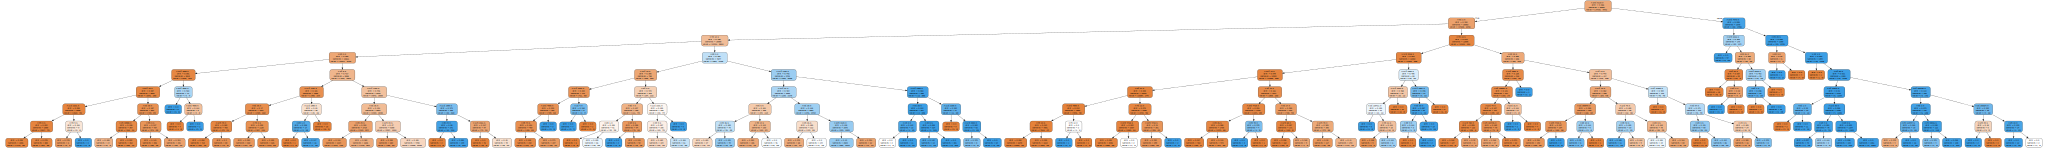

In [59]:
dot_data = tree.export_graphviz(clf2, out_file=None,   
                      filled=True, rounded=True,  
                      special_characters=True)  
graph = graphviz.Source(dot_data)  
graph. 

In [62]:
import pydotplus

In [64]:
dot_data = tree.export_graphviz(clf2, out_file=None,   
                      filled=True, rounded=True,  
                      special_characters=True)
pydot_graph = pydotplus.graph_from_dot_data(dot_data)
pydot_graph.write_png('tree.png')

True

In [65]:
dot_data_ohe = tree.export_graphviz(clf, out_file=None,   
                      filled=True, rounded=True,  
                      special_characters=True)
pydot_graph2 = pydotplus.graph_from_dot_data(dot_data_ohe)
pydot_graph.write_png('tree_ohe.png')

True